<a href="https://colab.research.google.com/github/mateenali02/YBI-Mileage-Prediction/blob/main/Mateen_Mileage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mileage Prediction - Regression Analysis

### Source:
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

### Dataset Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the 'mpg' attribute. The original dataset is available in the file "auto-mpg.data-original

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

### Attribute Information:
1. mpg continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight continuous
5. acceleration: continuous
7. model year: multi-valued discrete
8. origin multi-valued discrete
9. car name: string (unique for each instance)

#Data source

https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv

# Import Libraries


In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

# Import Dataset

In [5]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Remove Missing Values

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Visualization

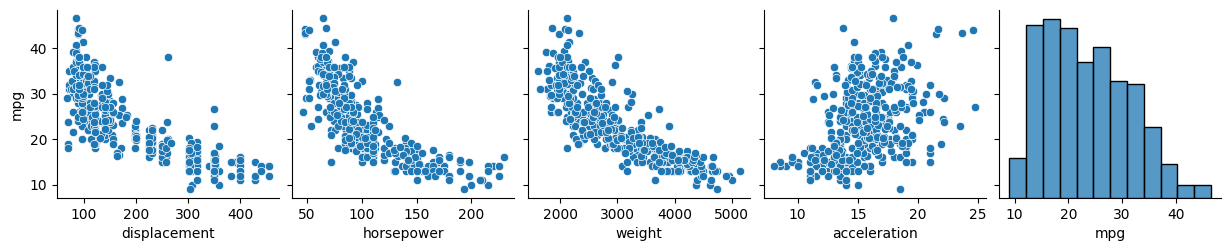

In [13]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

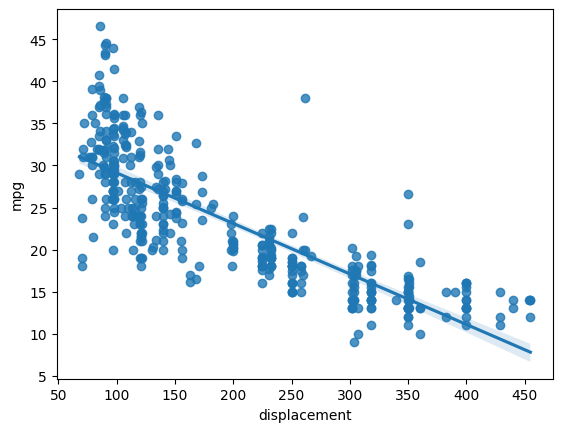

In [14]:
sns.regplot(x='displacement',y='mpg',data=df)

#Define Target Variable (Y) and Feature Variables (X)

In [17]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [18]:
y= df['mpg']

In [19]:
y.shape

(392,)

In [20]:
x=df[['displacement','horsepower','weight','acceleration']]

In [21]:
x.shape

(392, 4)

In [22]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [23]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

#Scaling Data

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()

In [27]:
X = ss.fit_transform(x)

In [28]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [29]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


#Train Test Split Data 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size=0.7,random_state=1245)

In [32]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((274, 4), (118, 4), (274,), (118,))

#Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
lr= LinearRegression()

In [36]:
lr.fit(X_train,Y_train)

LinearRegression()

In [37]:
lr.intercept_

23.31652607051415

In [39]:
lr.coef_

array([ 0.71226706, -1.74447607, -5.5544019 ,  0.35444415])

#Predict Test Data

In [40]:
y_pred = lr.predict(X_test)

In [41]:
y_pred

array([29.05691385, 30.69007821, 23.20076421, 26.05709812, 26.64062096,
       11.84007944, 27.92121463, 26.08462738, 18.2002111 ,  7.22349978,
       27.24527796, 23.25191213, 28.8358917 , 20.97896739, 17.08219986,
       23.29794903, 31.90994993, 13.09576912, 30.84579896, 26.87081751,
       16.70198468, 29.73497103, 22.36937274, 18.5598396 , 16.161259  ,
       25.25784484, 10.90574919, 31.47098751, 23.79082625, 30.8893214 ,
       21.83538014, 28.71123473, 24.45912276, 26.00513899,  8.50991566,
       18.50697192, 30.84812398, 28.81564694, 30.82469523, 30.70440054,
       12.55654565, 12.58403224, 11.58424899, 17.28605581, 32.59852374,
       27.38069908, 33.71283046, 29.58956845, 28.81564694, 28.8838601 ,
       16.93065728, 20.00336527, 21.79697364, 25.87089455, 30.96243383,
       19.46382278, 23.05971943,  8.93941932, 11.26478413, 30.51347412,
       24.68483536, 22.13838995, 31.10242208, 14.02890865, 13.82740185,
       28.59343164, 14.47172317, 16.93065728, 30.79580007, 27.47

#Model Accuracy

In [42]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , r2_score 

In [43]:
mean_absolute_error(Y_test,y_pred)

3.181495499085109

In [44]:
mean_absolute_percentage_error(Y_test,y_pred)

0.141621420302305

In [45]:
r2_score(Y_test,y_pred)

0.7182573424867784

#Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [49]:
X_train2 = poly.fit_transform(X_train)

In [50]:
X_test2 = poly.fit_transform(X_test)

In [53]:
lr.fit(X_train2,Y_train)

LinearRegression()

In [54]:
lr.intercept_

21.042446160516626

In [56]:
lr.coef_


array([-0.99370235, -5.434826  , -2.50183143, -0.46100628,  1.74916032,
       -0.02004741,  0.63107251,  0.96786975, -0.60943589,  0.34493914])

In [57]:
y_pred_poly = lr.predict(X_test2)

#Model Accuracy

In [58]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error , r2_score

In [59]:
mean_absolute_error(Y_test,y_pred_poly)

2.921562437884766

In [60]:
mean_absolute_percentage_error(Y_test,y_pred_poly)

0.12462025906091376

In [61]:
r2_score(Y_test,y_pred_poly)

0.7421460554448585